In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

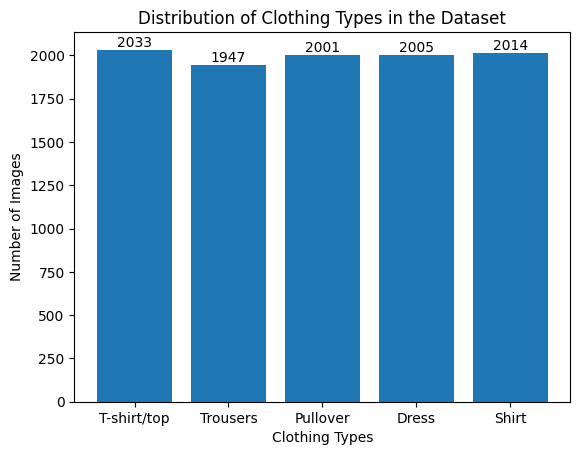

In [3]:
train_labels = train_data[:, -1]
test_labels = test_data[:, -1]
all_labels = train_labels
label_counts = np.bincount(all_labels.astype(int))
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Shirt']

fig, ax = plt.subplots()
bars = ax.bar(class_names, label_counts)

for bar, count in zip(bars, label_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Clothing Types')
plt.ylabel('Number of Images')
plt.title('Distribution of Clothing Types in the Dataset')
plt.show()


In [4]:
missing_values = np.isnan(train_data[:, :-1])
missing_values_count = np.sum(missing_values, axis=0)
print("Missing Values per Pixel Column:")
print(missing_values_count)

Missing Values per Pixel Column:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

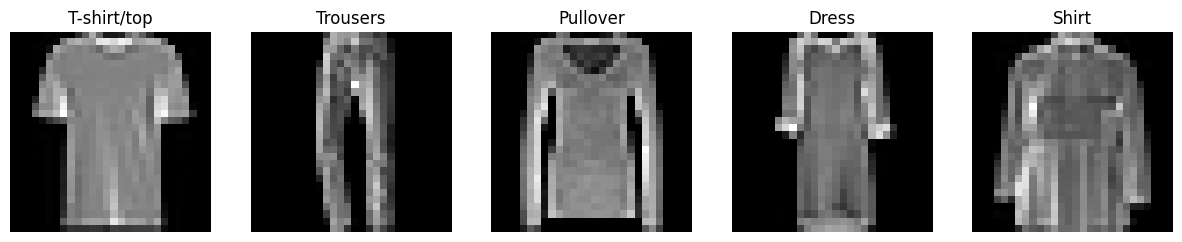

In [5]:
class_mapping = {0: 'T-shirt/top', 1: 'Trousers', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}
one_image_per_class = [train_data[train_data[:, -1] == clothing_class][0, :-1] for clothing_class in np.unique(train_data[:, -1])]

fig, axes = plt.subplots(1, len(one_image_per_class), figsize=(15, 3))

for i, (image, clothing_class) in enumerate(zip(one_image_per_class, np.unique(train_data[:, -1]))):
    axes[i].imshow(image.reshape(28, 28), cmap='gray')
    axes[i].set_title(class_mapping[int(clothing_class)])
    axes[i].axis('off')

plt.show()